In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

In [ ]:
tweets = pd.read_csv('/work/Preprocessed/cleaned_data.csv')
tweets

,sentimen,tweet
0,negatif,kata prabowo indonesia tidak harga bangsa asin...
1,netral,batu langka tasbih jokowi hadiah dari habib lu...
2,netral,di era jokowi ekonomi indonesia makin baik ind...
3,positif,bagi sumatera selatan asi games dampak pd ekon...
4,negatif,negara kita ngutang buat bngun infrastruktur y...
...,...,...
1810,netral,negarawan sejati sll bangga dan depan harga di...
1811,netral,satu hrs ceramah di damai indonesia dua ekonom...
1812,netral,mari bangun bangsa dgn dukung ekonomi negara s...
1813,netral,bantu maju ekonomi bangsa sama pak jokowi yuk


In [ ]:
# Importing Regular expression for word searching
import re
def word_in_text(word, text):
    try:
        text = text.lower()
        match = re.search(word, text)
        if match:
            return True
        return False
    except AttributeError:
        return False

In [ ]:
filtered_tweets = tweets[tweets['tweet'].str.contains("", case=False, na=False)]
filtered_tweets

,sentimen,tweet,jokowi,prabowo,maruf,sandi
645,netral,tkn soal wo demokrat prabowo bagi inti orba ya...,True,True,False,False
951,netral,saat bicara tumbuh ekonomi capres nomor urut s...,True,False,False,False
1041,netral,pada debat tadi malam capres nomor urut dua pr...,False,True,False,False
1267,negatif,heran cnn massive serang parbowo sandi dengan ...,False,True,False,True


In [ ]:
raw = pd.read_csv('/work/tweet.csv')
raw['jokowi'] = raw['tweet'].apply(lambda tweet: word_in_text('jokowi', tweet))
raw['prabowo'] = raw['tweet'].apply(lambda tweet: word_in_text('prabowo', tweet))
raw['maruf'] = raw['tweet'].apply(lambda tweet: word_in_text('maruf', tweet))
raw['sandi'] = raw['tweet'].apply(lambda tweet: word_in_text('sandi', tweet))



# Check how many have the mentions of Jokowi and Prabowo
print (raw['jokowi'].value_counts().iloc[1])
print (raw['prabowo'].value_counts().iloc[1])
print (raw['maruf'].value_counts().iloc[1])
print (raw['sandi'].value_counts().iloc[1])

809
852
35
509


In [ ]:
# Identifying new column and newslist to scrape based on current tweets data
raw["newssource"] = "unidentified"
newslist=['nytimes','jurnal_IDN','tempoteve','KPU_ID','CNNIndonesia','kompas','Metro_TV','Berisatu','tvonetv','PaaiSocmed']

# Looping through each news and give news sources
for news in newslist:
   raw.loc[raw.tweet.str.contains("@"+news), 'newssource'] = news

raw.head()

,Unnamed: 0,sentimen,tweet,newssource,jokowi,prabowo,maruf,sandi
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,unidentified,False,True,False,False
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",unidentified,True,False,False,False
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....",unidentified,True,False,False,False
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...",unidentified,True,False,False,False
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...,unidentified,False,False,False,False


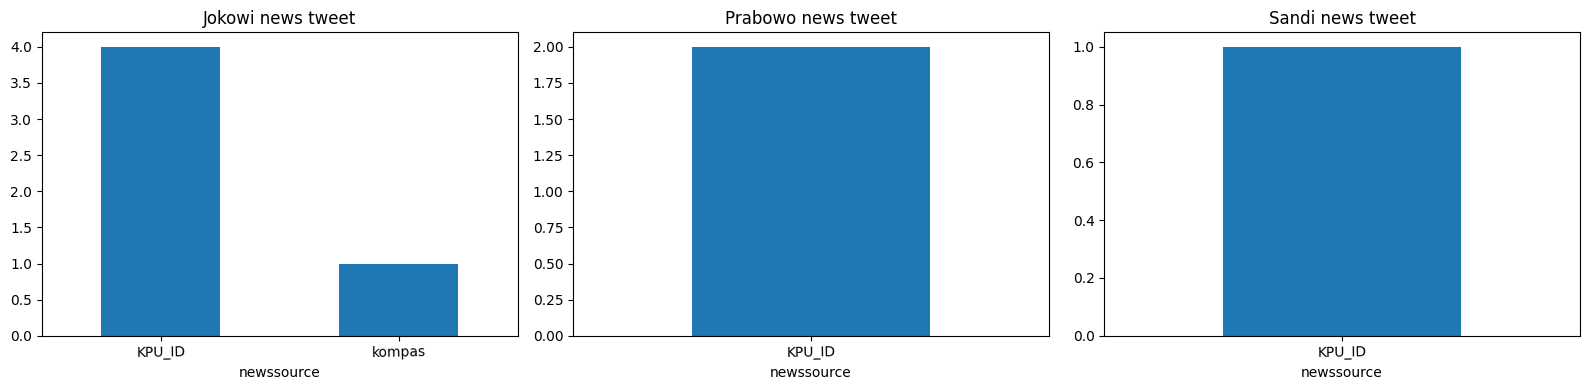

In [ ]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 3)  # Adjusted to 3 subplots
fig.set_size_inches(16, 4)

# Getting polarity text analysis based on tweetsnews
jokowitweetsnews = raw[(raw.jokowi == True) & (raw.newssource != "unidentified")]
prabowotweetsnews = raw[(raw.prabowo == True) & (raw.newssource != "unidentified")]
sanditweetsnews = raw[(raw.sandi == True) & (raw.newssource != "unidentified")]

# Count tweets for each news source
jokowitweetsnewscnt = jokowitweetsnews.groupby(["newssource"]).tweet.count()
prabowotweetsnewscnt = prabowotweetsnews.groupby(["newssource"]).tweet.count()
sanditweetsnewscnt = sanditweetsnews.groupby(["newssource"]).tweet.count()

# Plotting
jokowitweetsnewscnt.T.plot(kind='bar', stacked=True, rot=1, title="Jokowi news tweet", ax=axs[0])
prabowotweetsnewscnt.T.plot(kind='bar', stacked=True, rot=1, title="Prabowo news tweet", ax=axs[1])
sanditweetsnewscnt.T.plot(kind='bar', stacked=True, rot=1, title="Sandi news tweet", ax=axs[2])  # Use axs[2] for Sandi

plt.tight_layout()  # Optimize plot layout
plt.show()


In [ ]:
# Display frequency count for Jokowi news tweets
print("Frequency count for Jokowi news tweets:")
print(jokowitweetsnewscnt)

# Display frequency count for Prabowo news tweets
print("\nFrequency count for Prabowo news tweets:")
print(prabowotweetsnewscnt)

# Display frequency count for Sandi news tweets
print("\nFrequency count for Sandi news tweets:")
print(sanditweetsnewscnt)


Frequency count for Jokowi news tweets:
newssource
KPU_ID    4
kompas    1
Name: tweet, dtype: int64

Frequency count for Prabowo news tweets:
newssource
KPU_ID    2
Name: tweet, dtype: int64

Frequency count for Sandi news tweets:
newssource
KPU_ID    1
Name: tweet, dtype: int64


In [ ]:
# Checking how many tweets talk about each presidential candidate
tweets['jokowi'] = tweets['tweet'].apply(lambda tweet: word_in_text('jokowi', tweet))
tweets['prabowo'] = tweets['tweet'].apply(lambda tweet: word_in_text('prabowo', tweet))
tweets['maruf'] = tweets['tweet'].apply(lambda tweet: word_in_text('maruf', tweet))
tweets['sandi'] = tweets['tweet'].apply(lambda tweet: word_in_text('sandi', tweet))



# Check how many have the mentions of Jokowi and Prabowo
print (tweets['jokowi'].value_counts().iloc[1])
print (tweets['prabowo'].value_counts().iloc[1])
print (tweets['maruf'].value_counts().iloc[1])
print (tweets['sandi'].value_counts().iloc[1])

802
846
49
500


In [ ]:
tweets

,sentimen,tweet,jokowi,prabowo,maruf,sandi
0,negatif,kata prabowo indonesia tidak harga bangsa asin...,False,True,False,False
1,netral,batu langka tasbih jokowi hadiah dari habib lu...,True,False,False,False
2,netral,di era jokowi ekonomi indonesia makin baik ind...,True,False,False,False
3,positif,bagi sumatera selatan asi games dampak pd ekon...,True,False,False,False
4,negatif,negara kita ngutang buat bngun infrastruktur y...,False,False,False,False
...,...,...,...,...,...,...
1810,netral,negarawan sejati sll bangga dan depan harga di...,False,False,False,False
1811,netral,satu hrs ceramah di damai indonesia dua ekonom...,False,False,False,False
1812,netral,mari bangun bangsa dgn dukung ekonomi negara s...,True,False,False,False
1813,netral,bantu maju ekonomi bangsa sama pak jokowi yuk,True,False,False,False


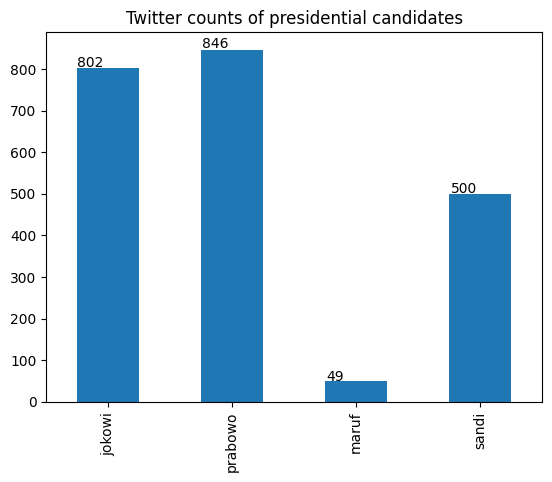

In [ ]:

# List of presidential candidates
presidential_candidates = ['jokowi', 'prabowo', 'maruf', 'sandi']

# Get tweet counts for each candidate
tweets_by_pres_candidates = [tweets[candidate].value_counts().iloc[1] for candidate in presidential_candidates]

# Create DataFrame
candidate_frame = pd.DataFrame(tweets_by_pres_candidates, index=presidential_candidates)

# Create bar plot
ax = candidate_frame.plot(kind='bar', legend=False, title="Twitter counts of presidential candidates")

# Add frequency count labels
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


In [ ]:
# Separating each candidates
jokowitweets = tweets[tweets.jokowi==True]
prabowotweets = tweets[tweets.prabowo == True]
maruftweets = tweets[tweets.maruf == True]
sanditweets = tweets[tweets.sandi == True]

jokowicnt = jokowitweets['sentimen'].value_counts().rename("jokowi")
prabowocnt = prabowotweets['sentimen'].value_counts().rename("prabowo")
marufcnt = maruftweets['sentimen'].value_counts().rename("maruf")
sandicnt = sanditweets['sentimen'].value_counts().rename("sandi")

presidentialcnt = pd.concat([jokowicnt, prabowocnt, marufcnt, sandicnt], axis=1)
print(presidentialcnt)

          jokowi  prabowo  maruf  sandi
sentimen                               
netral       303      307     26    178
positif      269      301     20    226
negatif      230      238      3     96


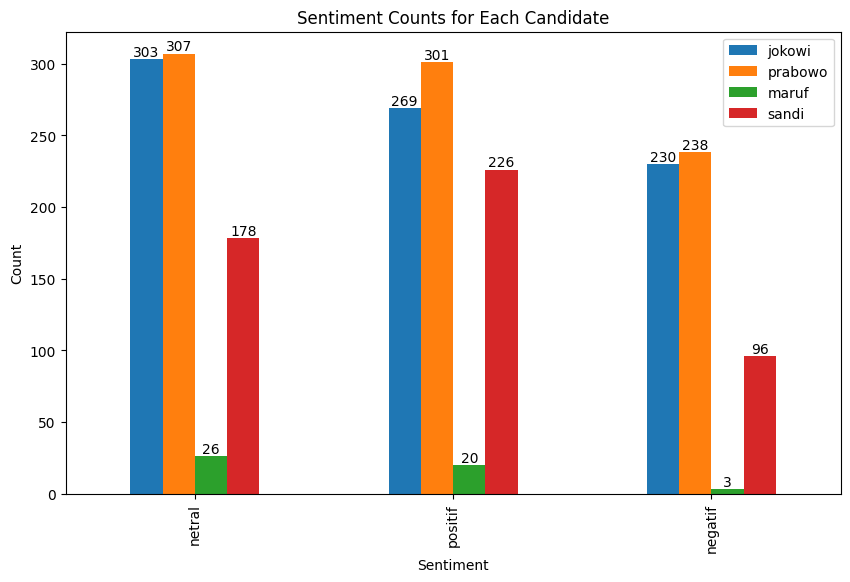

In [ ]:
import matplotlib.pyplot as plt

# Plotting
ax = presidentialcnt.plot(kind='bar', figsize=(10, 6))
plt.title('Sentiment Counts for Each Candidate')
plt.xlabel('Sentiment')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Show the updated plot
plt.show()


In [ ]:
print(tweets.sample(1))

    sentimen                                              tweet  jokowi  \
604  positif  dengan pilih prabowo sandi anda telah bersodaq...   False   

     prabowo  maruf  sandi  
604     True  False   True  


### POS- Tagging

In [ ]:
import nltk
import os
import pickle
import warnings
import wget
from nlp_id.tokenizer import Tokenizer
from nltk.tree import Tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
tokenizer = Tokenizer()

In [ ]:
dataset_path ="/work/Utils/dataset_postag.txt"

In [ ]:
def read_dataset(dataset_path=None):

    with open(dataset_path) as f:
        raw_file = f.read().split("\n")

    files = [i.split("\t") for i in raw_file]

    sentences, tags, temp_sentences, temp_tags = [], [], [], []

    for file in files:
        if file != [""]:
            temp_sentences.append(file[0])  # get the sentences
            temp_tags.append(file[1])  # get the tag
        else:
            # check if the temp sentences and temp tags is not null
            # and both of them have the same length
            if len(temp_sentences) > 0 and (
                len(temp_sentences) == len(temp_tags)
            ):
                sentences.append(temp_sentences)
                tags.append(temp_tags)
            temp_sentences, temp_tags = [], []
    return sentences, tags

In [ ]:
read_dataset(dataset_path)

([['Ditjen',
   'Bea',
   'dan',
   'Cukai',
   'Kementerian',
   'Keuangan',
   '(',
   'Kemenkeu',
   ')',
   'memastikan',
   'ada',
   'nya',
   '18',
   'kotak',
   'selundupan',
   'yang',
   'dibawa',
   'melalui',
   'pesawat',
   'baru',
   'Airbus',
   'A330-900',
   'Neo',
   'milik',
   'Garuda',
   'Indonesia',
   '.'],
  ['Pengambilan',
   'foto',
   'dilakukan',
   'dari',
   'kepala',
   'perahu',
   'sehingga',
   'menghasilkan',
   'foto',
   'yang',
   'sangat',
   'menarik',
   '.'],
  ['Vice',
   'President',
   'Corporate',
   'Secretary',
   'Garuda',
   'Indonesia',
   ',',
   'M',
   '.'],
  ['Di',
   'sana',
   ',',
   'penumpang',
   'mengungkapkan',
   'atau',
   'men-declare',
   'barang',
   'bawaan',
   ',',
   'termasuk',
   'yang',
   'disebut',
   'sparepart',
   'Harley',
   'dan',
   'sepeda',
   'Brompton',
   '.'],
  ['Kita', '(', 'penumpang', ')', 'self', 'declare', '.'],
  ['Untuk',
   'clean',
   'and',
   'jerk',
   ',',
   'sosok',
   'berusia

In [ ]:
sentences, tags = read_dataset(dataset_path)

In [ ]:
def features(sentence, index):
    """ sentence: [w1, w2, ...], index: the index of the word """
    return {
        "word": sentence[index],
        "is_first": index == 0,
        "is_last": index == len(sentence) - 1,
        "is_capitalized": sentence[index][0].upper()
        == sentence[index][0],
        "is_all_caps": sentence[index].upper() == sentence[index],
        "is_all_lower": sentence[index].lower() == sentence[index],
        "has_hyphen": "-" in sentence[index],
        "is_numeric": sentence[index].isdigit(),
        "capitals_inside": sentence[index][1:].lower()
        != sentence[index][1:],
        "prefix-1": sentence[index][0],
        "prefix-1-lower": sentence[index][0].lower(),
        "prefix-2": sentence[index][:2],
        "prefix-2-lower": sentence[index][:2].lower(),
        "prefix-3": sentence[index][:3],
        "prefix-3-lower": sentence[index][:3].lower(),
        "suffix-1": sentence[index][-1],
        "suffix-1-lower": sentence[index][-1].lower(),
        "suffix-2": sentence[index][-2:],
        "suffix-2-lower": sentence[index][-2:].lower(),
        "suffix-3": sentence[index][-3:],
        "suffix-3-lower": sentence[index][-3:].lower(),
        "lowercase_word": sentence[index].lower(),
        "prev_word": "" if index == 0 else sentence[index - 1],
        "next_word": ""
        if index == len(sentence) - 1
        else sentence[index + 1],
        "prev_word_is_capitalized": False
        if index == 0
        else sentence[index - 1][0].upper() == sentence[index - 1][0],
        "next_word_is_capitalized": False
        if index == len(sentence) - 1
        else sentence[index + 1][0].upper() == sentence[index + 1][0],
        "2-prev-word": "" if index <= 1 else sentence[index - 2],
        "2-next-word": ""
        if index >= len(sentence) - 2
        else sentence[index + 2],
    }

In [ ]:
def transform_to_dataset(sentences, tags):
    X, y = [], []

    for sentence_idx in range(len(sentences)):
        for index in range(len(sentences[sentence_idx])):
            X.append(features(sentences[sentence_idx], index))
            y.append(tags[sentence_idx][index])

    return X, y

In [ ]:
clf = Pipeline(
        [
            ("vectorizer", DictVectorizer(sparse=True)),
            (
                "classifier",
                RandomForestClassifier(
                    criterion="gini", n_estimators=15, random_state=2020
                ),
            ),
        ]
    )

In [ ]:
def train(sentences, tags):
    """
    training
    """
    clf.fit(sentences, tags)

In [ ]:
sentences, tags = transform_to_dataset(sentences, tags)

In [ ]:
train(sentences, tags)

KernelInterrupted: Execution interrupted by the Jupyter kernel.

In [ ]:
def save_model(model_path):
    pickle_out = open(model_path, "wb")
    pickle.dump(clf, pickle_out)
    pickle_out.close()

In [ ]:
model_path = "/work/Utils/dataset_postag.txt"
save_model(model_path)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2b3c5800-c216-4f08-93af-5173ca1bb328' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>